In [1]:
from vae_conditional import train_cvae

network_architecture = {
    "n_width": 32,
    "n_z": 20,  # dimensionality of latent space
    "n_hidden_units": 500,
    "n_layers": 3,
}

cvae = train_cvae(network_architecture, saving_step=5, training_epochs=200)

Epoch: 0001 Cost: 232.743361130 Time: 10.320
Accuracy: 0.5762
Model has been saved to: tmp/CVAE.20180612223024490604.step0
Epoch: 0002 Cost: 197.647031453 Time: 23.268
Epoch: 0003 Cost: 182.749343592 Time: 33.448
Epoch: 0004 Cost: 175.968051351 Time: 43.594
Epoch: 0005 Cost: 171.070577494 Time: 53.795
Epoch: 0006 Cost: 168.333769048 Time: 63.933
Accuracy: 0.8633
Model has been saved to: tmp/CVAE.20180612223024490604.step5
Epoch: 0007 Cost: 166.410633825 Time: 76.843
Epoch: 0008 Cost: 165.092024511 Time: 86.986
Epoch: 0009 Cost: 163.892882207 Time: 97.254
Epoch: 0010 Cost: 162.881729024 Time: 107.464
Epoch: 0011 Cost: 161.884635722 Time: 117.680
Accuracy: 0.8969
Model has been saved to: tmp/CVAE.20180612223024490604.step10
Epoch: 0012 Cost: 161.088584925 Time: 130.753
Epoch: 0013 Cost: 160.261951803 Time: 140.960
Epoch: 0014 Cost: 159.410093664 Time: 151.037
Epoch: 0015 Cost: 158.577851639 Time: 161.252
Epoch: 0016 Cost: 157.824642537 Time: 171.471
Accuracy: 0.8998
Model has been saved 

Epoch: 0133 Cost: 144.533796565 Time: 1427.999
Epoch: 0134 Cost: 144.519711634 Time: 1438.135
Epoch: 0135 Cost: 144.468159663 Time: 1448.423
Epoch: 0136 Cost: 144.415146205 Time: 1458.576
Accuracy: 0.9426
Model has been saved to: tmp/CVAE.20180612223024490604.step135
Epoch: 0137 Cost: 144.436256282 Time: 1471.477
Epoch: 0138 Cost: 144.373376821 Time: 1481.581
Epoch: 0139 Cost: 144.369836019 Time: 1491.687
Epoch: 0140 Cost: 144.331206640 Time: 1501.854
Epoch: 0141 Cost: 144.280645167 Time: 1512.016
Accuracy: 0.9405
Model has been saved to: tmp/CVAE.20180612223024490604.step140
Epoch: 0142 Cost: 144.266975301 Time: 1524.909
Epoch: 0143 Cost: 144.246434555 Time: 1535.018
Epoch: 0144 Cost: 144.234843470 Time: 1545.144
Epoch: 0145 Cost: nan Time: 1555.348
Epoch: 0146 Cost: nan Time: 1565.506
Accuracy: 0.0992
Model has been saved to: tmp/CVAE.20180612223024490604.step145
Epoch: 0147 Cost: nan Time: 1578.441
Epoch: 0148 Cost: nan Time: 1588.574
Epoch: 0149 Cost: nan Time: 1598.739
Epoch: 0150

KeyboardInterrupt: 

In [3]:
from vae_conditional import CVAE

network_architecture = {
    "n_width": 32,
    "n_z": 20,  # dimensionality of latent space
    "n_hidden_units": 500,
    "n_layers": 3,
}

cvae = CVAE(network_architecture)
cvae.load("tmp/CVAE.20180612223024490604.step130")

/home/ubuntu/tensor/lib/python3.5/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from tmp/CVAE.20180612223024490604.step130


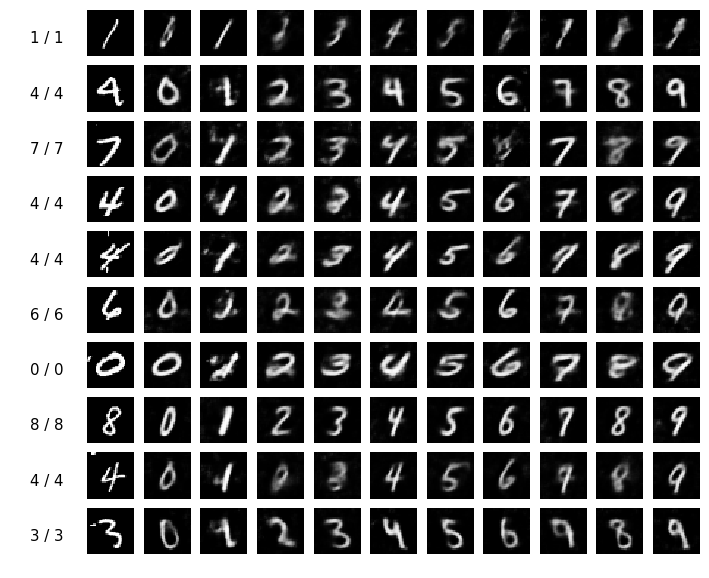

In [13]:
import matplotlib.pyplot as plt
import mnist
import numpy as np

n_width = 32
n_samples = 10
test_x, test_y = mnist.test_32_flat_labeled(n_samples)

x_reconstruct = cvae.reconstruct_with_y(test_x, test_y)
pred_y = cvae.predict(test_x)

plt.figure(figsize=(12, n_samples))
for i in range(n_samples):
    plt.subplot(n_samples, 12, 12 * i + 1)
    correct = test_y[i] == pred_y[i]
    plt.text(0, 0.3, "%d / %d" % (test_y[i], pred_y[i]), fontsize=15, color="black" if correct else "red")
    plt.axis("off")
    plt.subplot(n_samples, 12, 12 * i + 2)
    plt.imshow(test_x[i].reshape(32, 32), vmin=0, vmax=1, cmap="gray")
    plt.axis("off")
for clas in range(10):
    guess = np.asarray([clas] * test_x.shape[0])
    med = cvae.reconstruct_with_y(test_x, guess)
    for i in range(n_samples):
        plt.subplot(n_samples, 12, 12 * i + clas + 3)
        plt.imshow(med[i].reshape(32, 32), vmin=0, vmax=1, cmap="gray")
        plt.axis("off")
# plt.tight_layout()
plt.show()

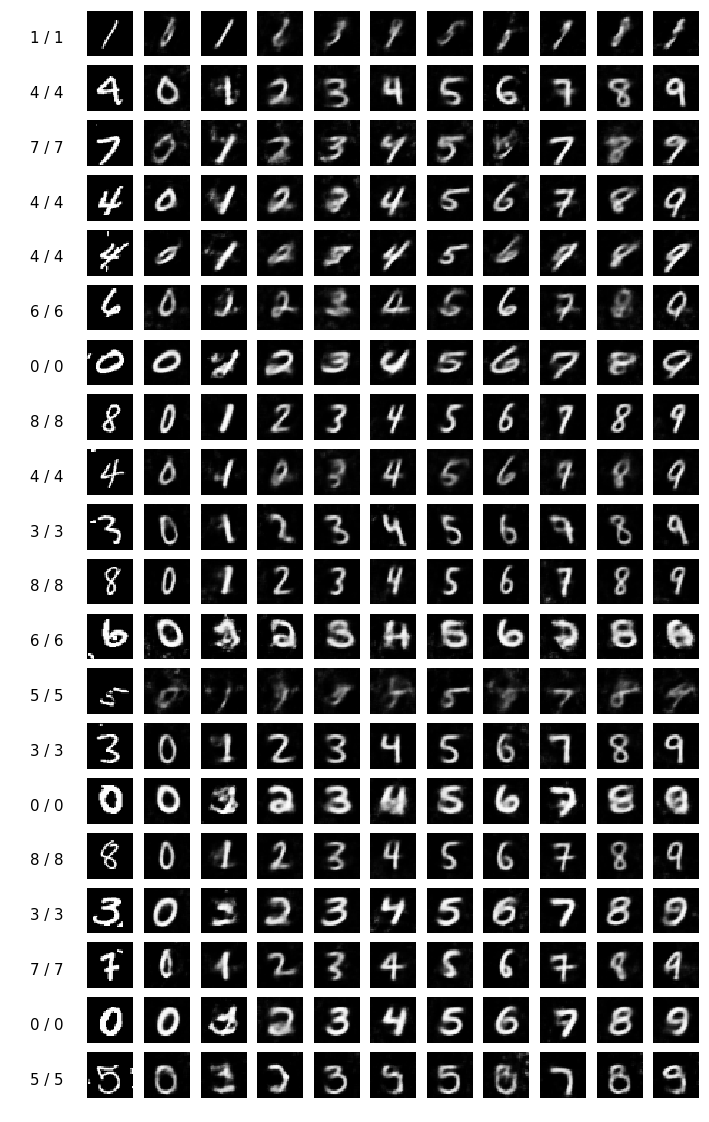

In [12]:
import matplotlib.pyplot as plt
import mnist
import numpy as np

n_width = 32
n_samples = 20
test_x, test_y = mnist.test_32_flat_labeled(n_samples)

x_reconstruct = cvae.reconstruct_with_y(test_x, test_y)
pred_y = cvae.predict(test_x)

plt.figure(figsize=(12, n_samples))
for i in range(n_samples):
    plt.subplot(n_samples, 12, 12 * i + 1)
    correct = test_y[i] == pred_y[i]
    plt.text(0, 0.3, "%d / %d" % (test_y[i], pred_y[i]), fontsize=15, color="black" if correct else "red")
    plt.axis("off")
    plt.subplot(n_samples, 12, 12 * i + 2)
    plt.imshow(test_x[i].reshape(32, 32), vmin=0, vmax=1, cmap="gray")
    plt.axis("off")
for clas in range(10):
    guess = np.asarray([clas] * test_x.shape[0])
    med = cvae.reconstruct_with_y(test_x, guess)
    for i in range(n_samples):
        plt.subplot(n_samples, 12, 12 * i + clas + 3)
        plt.imshow(med[i].reshape(32, 32), vmin=0, vmax=1, cmap="gray")
        plt.axis("off")
# plt.tight_layout()
plt.show()

[8 9 3 5 6 7 8 3 4 7]
[3 4 2 0 5 9 9 8 7 9]


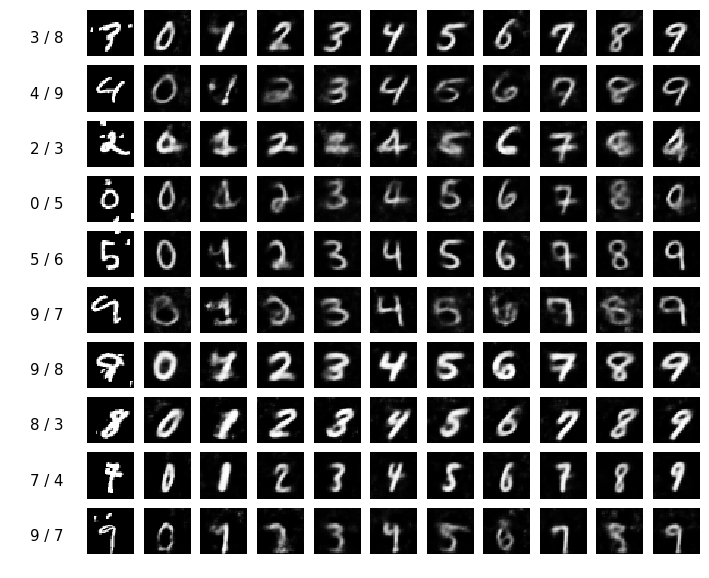

In [17]:
import matplotlib.pyplot as plt
import mnist
import numpy as np

n_width = 32
n_samples = 0
test_x, test_y = mnist.test_32_flat_labeled(200)

x_reconstruct = cvae.reconstruct_with_y(test_x, test_y)
pred_y = cvae.predict(test_x)
x, py, y = [], [], []

idx = list(filter(lambda i: test_y[i] != pred_y[i], range(200)))
x = np.asarray([test_x[i] for i in idx])
py = np.asarray([pred_y[i] for i in idx])
y = np.asarray([test_y[i] for i in idx])
print(py)
print(y)
n_samples = len(y)

plt.figure(figsize=(12, n_samples))
for i in range(n_samples):
    plt.subplot(n_samples, 12, 12 * i + 1)
    plt.text(0, 0.3, "%d / %d" % (y[i], py[i]), fontsize=15)
    plt.axis("off")
    plt.subplot(n_samples, 12, 12 * i + 2)
    plt.imshow(x[i].reshape(32, 32), vmin=0, vmax=1, cmap="gray")
    plt.axis("off")
for clas in range(10):
    guess = np.asarray([clas] * x.shape[0])
    med = cvae.reconstruct_with_y(x, guess)
    for i in range(n_samples):
        plt.subplot(n_samples, 12, 12 * i + clas + 3)
        plt.imshow(med[i].reshape(32, 32), vmin=0, vmax=1, cmap="gray")
        plt.axis("off")
# plt.tight_layout()
plt.show()

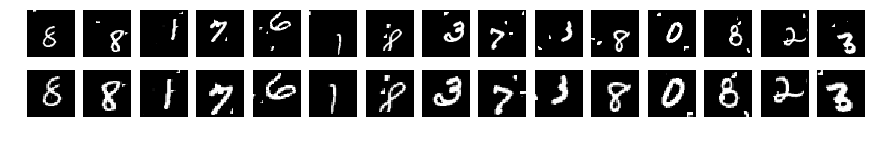

In [24]:
raw_x, _ = mnist.train()
new_x = mnist.train_32()


plt.figure(figsize=(15, 2))
for i in range(15):
    plt.subplot(2, 15, i + 1)
    plt.imshow(raw_x[i].reshape(45, 45), vmin=0, vmax=255, cmap="gray")
    plt.axis("off")
    plt.subplot(2, 15, i + 16)
    plt.imshow(new_x[i].reshape(32, 32), vmin=0, vmax=255, cmap="gray")
    plt.axis("off")
# plt.tight_layout()
plt.show()

In [ ]:
from vae_conditional import train_cvae

network_architecture = {
    "n_width": 32,
    "n_z": 2,  # dimensionality of latent space
    "n_hidden_units": 500,
    "n_layers": 3,
}

cvae_2d = train_cvae(network_architecture, saving_step=5, training_epochs=30)